In [48]:
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Vivienda

In [49]:
file = "../../data/eic2015_09_csv/TR_VIVIENDA09.CSV"

In [50]:
df = pd.read_csv(file, encoding='latin')

In [51]:
df.head()

,ID_VIV,ENT,NOM_ENT,MUN,NOM_MUN,LOC50K,NOM_LOC,COBERTURA,ESTRATO,UPM,...,ALIM_MEN2,ALIM_MEN3,ING_ALIM_MEN1,ING_ALIM_MEN2,ING_ALIM_MEN3,TAMLOC,TIPOHOG,JEFE_SEXO,JEFE_EDAD,INGTRHOG
0,90020000001,9,Distrito Federal,2,Azcapotzalco,1,Azcapotzalco,2,09-002-02,48547,...,NaN,NaN,NaN,NaN,NaN,5,2,1,25,6000.0
1,90020000002,9,Distrito Federal,2,Azcapotzalco,1,Azcapotzalco,2,09-002-03,48464,...,NaN,NaN,NaN,NaN,NaN,5,5,3,81,NaN
2,90020000003,9,Distrito Federal,2,Azcapotzalco,1,Azcapotzalco,2,09-002-02,48507,...,4.0,6.0,2.0,4.0,6.0,5,2,1,54,9429.0
3,90020000004,9,Distrito Federal,2,Azcapotzalco,1,Azcapotzalco,2,09-002-03,48473,...,NaN,NaN,NaN,NaN,NaN,5,1,1,50,28000.0
4,90020000005,9,Distrito Federal,2,Azcapotzalco,1,Azcapotzalco,2,09-002-02,48459,...,3.0,6.0,2.0,4.0,6.0,5,1,1,53,6000.0


In [52]:
df.shape

(160006, 88)

In [53]:
df_copy = df.copy()

In [54]:
df_copy.columns

Index(['ID_VIV', 'ENT', 'NOM_ENT', 'MUN', 'NOM_MUN', 'LOC50K', 'NOM_LOC',
       'COBERTURA', 'ESTRATO', 'UPM', 'FACTOR', 'CLAVIVP', 'PAREDES', 'TECHOS',
       'PISOS', 'CUADORM', 'TOTCUART', 'COCINA', 'LUGAR_COCINA', 'COMBUSTIBLE',
       'ESTUFA', 'ELECTRICIDAD', 'FOCOS', 'FOCOS_AHORRA', 'AGUA_ENTUBADA',
       'ABA_AGUA_ENTU', 'ABA_AGUA_NO_ENTU', 'TINACO', 'CISTERNA', 'BOMBA_AGUA',
       'REGADERA', 'BOILER', 'CALENTADOR_SOLAR', 'AIRE_ACON', 'PANEL_SOLAR',
       'SERSAN', 'CONAGUA', 'USOEXC', 'DRENAJE', 'DESTINO_BASURA',
       'SEPARA_BASURA', 'SEPARA_ALI', 'SEPARA_ABO', 'SEPARA_VEN',
       'REFRIGERADOR', 'LAVADORA', 'HORNO', 'AUTOPROP', 'RADIO', 'TELEVISOR',
       'TELEVISOR_PP', 'COMPUTADORA', 'TELEFONO', 'CELULAR', 'INTERNET',
       'SERV_TV_PAGA', 'TENENCIA', 'NUM_DUE_VIV1', 'NUM_DUE_VIV2',
       'ESCRITURAS_VIV', 'FORMA_ADQUI', 'FINANCIAMIENTO', 'DEUDA', 'NUMPERS',
       'INGR_PEROTROPAIS', 'INGR_PERDENTPAIS', 'INGR_AYUGOB', 'INGR_JUBPEN',
       'TERRENO_AGROPE', 'TE

## Check NA

In [55]:
df_copy.isnull().any().any()

True

In [56]:
df_copy.columns[df_copy.isnull().any()]

Index(['PAREDES', 'TECHOS', 'PISOS', 'CUADORM', 'TOTCUART', 'COCINA',
       'LUGAR_COCINA', 'COMBUSTIBLE', 'ESTUFA', 'ELECTRICIDAD', 'FOCOS',
       'FOCOS_AHORRA', 'AGUA_ENTUBADA', 'ABA_AGUA_ENTU', 'ABA_AGUA_NO_ENTU',
       'TINACO', 'CISTERNA', 'BOMBA_AGUA', 'REGADERA', 'BOILER',
       'CALENTADOR_SOLAR', 'AIRE_ACON', 'PANEL_SOLAR', 'SERSAN', 'CONAGUA',
       'USOEXC', 'DRENAJE', 'DESTINO_BASURA', 'SEPARA_BASURA', 'SEPARA_ALI',
       'SEPARA_ABO', 'SEPARA_VEN', 'REFRIGERADOR', 'LAVADORA', 'HORNO',
       'AUTOPROP', 'RADIO', 'TELEVISOR', 'TELEVISOR_PP', 'COMPUTADORA',
       'TELEFONO', 'CELULAR', 'INTERNET', 'SERV_TV_PAGA', 'TENENCIA',
       'NUM_DUE_VIV1', 'NUM_DUE_VIV2', 'ESCRITURAS_VIV', 'FORMA_ADQUI',
       'FINANCIAMIENTO', 'DEUDA', 'NUM_DUE_TERR', 'ALIM_MEN1', 'ALIM_MEN2',
       'ALIM_MEN3', 'ING_ALIM_MEN1', 'ING_ALIM_MEN2', 'ING_ALIM_MEN3',
       'INGTRHOG'],
      dtype='object')

In [57]:
len(pd.isnull(df_copy).any(1).nonzero()[0].tolist())

160006

In [58]:
df_copy.replace(to_replace=' ', value=np.NaN, inplace=True)

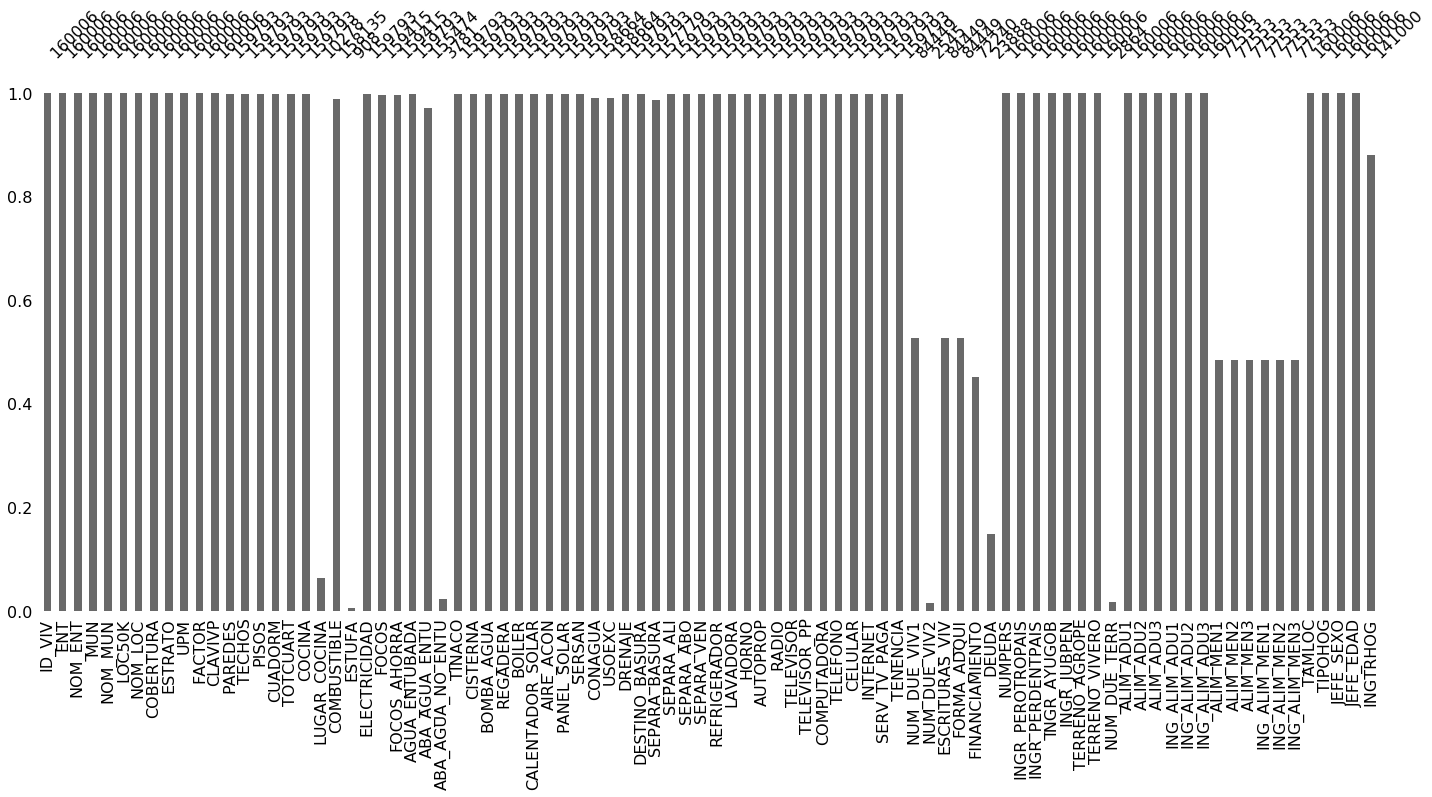

In [59]:
msno.bar(df_copy)
plt.savefig('../../images/pre_load_bar_vivienda.png')

In [60]:
df_copy.fillna(value=-1, inplace=True)

In [61]:
threshold = round(df_copy.shape[0]*.8)
threshold

128005

In [62]:
l = []
for column in df_copy.columns:
    na_column =  df_copy[column].value_counts().get(-1)
    if(na_column != None):
        #print(column, ': ', df_copy.shape[0] - na_column, ' - ', threshold)
        if (df_copy.shape[0] - na_column < threshold):
            #print(column, ': ', 'd e l e t e d')
            l.append(column)

In [63]:
df_copy.shape

(160006, 88)

In [64]:
len(l)

17

In [65]:
df_copy.drop(labels=l, axis=1, inplace=True)

In [66]:
df_copy.replace(to_replace=-1, value=np.NaN, inplace=True)

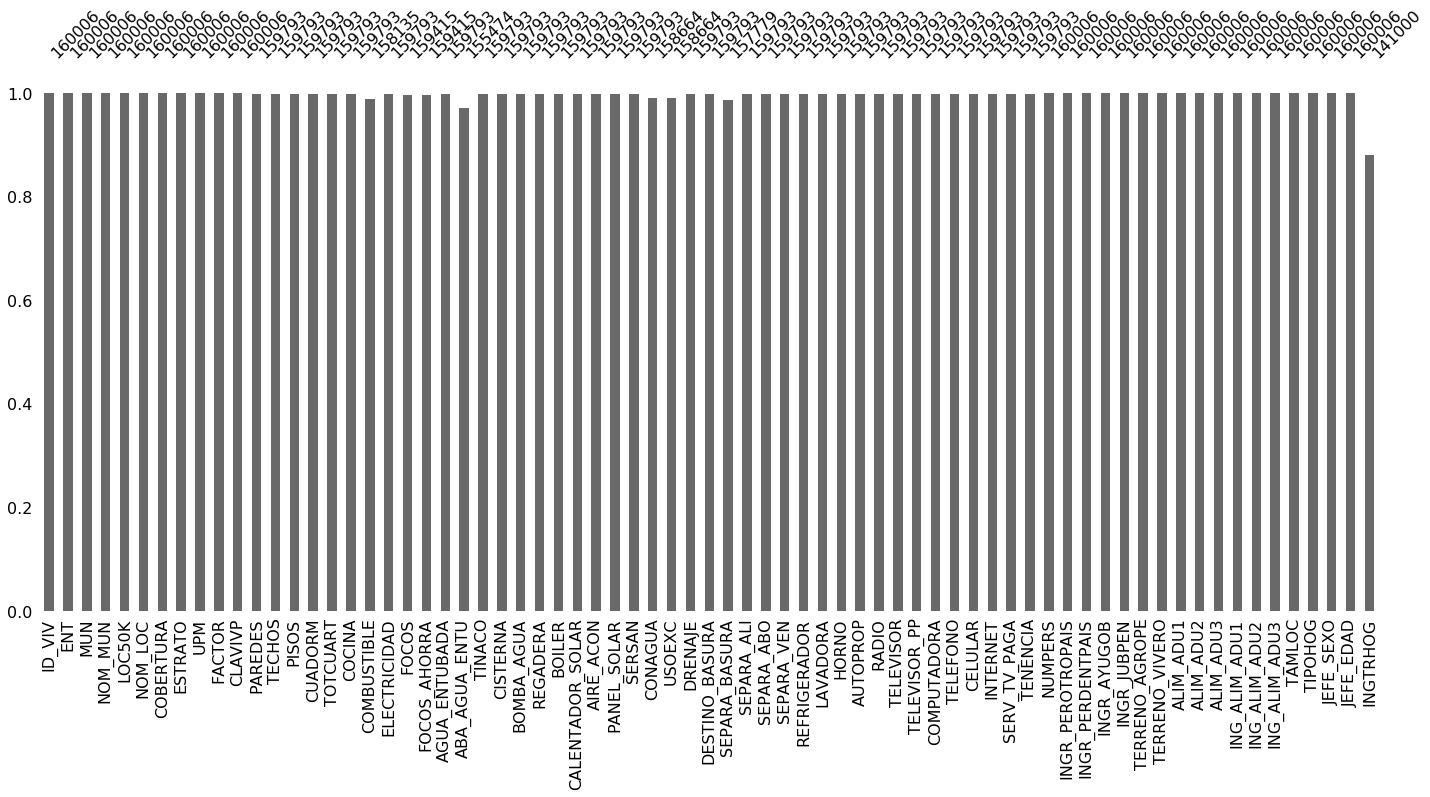

In [67]:
msno.bar(df_copy)
plt.savefig('../../images/post_load_bar_vivienda.png')

In [68]:
df_copy.isnull().any().any()

True

In [69]:
df_copy.shape

(160006, 71)

In [24]:
file = "../../dataframes/intercensal_vivienda.csv"

In [25]:
df_copy.to_csv(file)